In [ ]:
Dataset load

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil7280/coco-image-caption")


print("Path to dataset files:", path)

100%|██████████| 13.7G/13.7G [02:49<00:00, 87.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nikhil7280/coco-image-caption/versions/1


In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import json

# Path to the images directory
images_dir = "/root/.cache/kagglehub/datasets/nikhil7280/coco-image-caption/versions/1/train2014/train2014"

# Correct path to the annotations file
annotations_file = "/root/.cache/kagglehub/datasets/nikhil7280/coco-image-caption/versions/1/annotations_trainval2014/annotations/captions_train2014.json"

# Load the annotations (captions)
with open(annotations_file, "r") as f:
    annotations = json.load(f)

# Extract captions into a dictionary (using image_id as key)
captions_dict = {}
for annotation in annotations['annotations']:
    image_id = annotation['image_id']
    caption = annotation['caption']
    if image_id not in captions_dict:
        captions_dict[image_id] = []
    captions_dict[image_id].append(caption)

# List all image files in the directory
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]  # Assuming .jpg format

# Load images and match with captions
image_data_with_captions = []  # This will store (image, captions) tuples
for image_file in image_files:
    image_path = os.path.join(images_dir, image_file)
    # Extract image_id from the filename (assuming filename format is 'COCO_train2014_000000XXXXXX.jpg')
    image_id = int(image_file.split('_')[-1].split('.')[0])  # Extracts the numerical ID

    # Open the image
    image = Image.open(image_path)

    # Get the list of captions from the dictionary
    captions = captions_dict.get(image_id, ["No caption found"] * 5)  # Default to 5 captions if not found

    # Store image and its 5 captions together as a tuple
    image_data_with_captions.append((image, captions))



Total number of images loaded: 82783


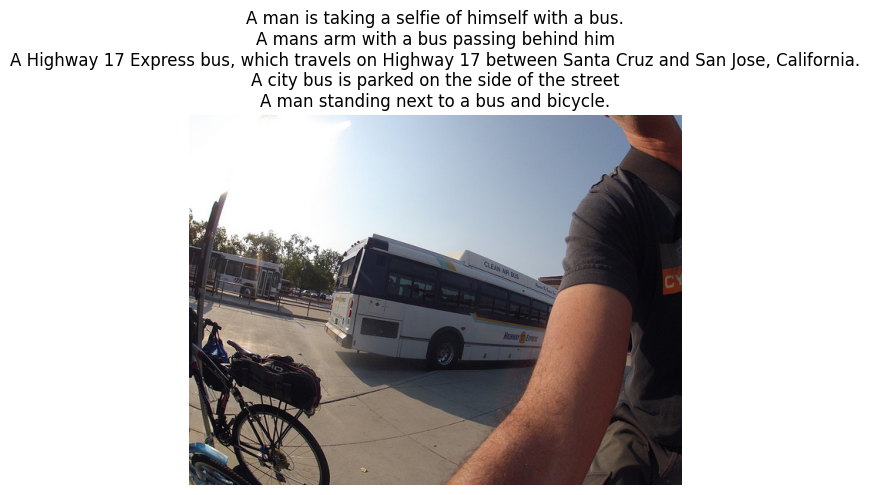

In [ ]:

# Print the number of images loaded
print(f"Total number of images loaded: {len(image_data_with_captions)}")

# Display the first image and its 5 captions
image, captions = image_data_with_captions[1]
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title("\n".join(captions))  # Display all 5 captions
plt.show()

In [ ]:
print(captions)

['A man is taking a selfie of himself with a bus.', 'A mans arm with a bus passing behind him', 'A Highway 17 Express bus, which travels on Highway 17 between Santa Cruz and San Jose, California.', 'A city bus is parked on the side of the street', 'A man standing next to a bus and bicycle.']


Actual work here

In [ ]:
import gensim.downloader as api

#c bow model
cbow_model = api.load('word2vec-google-news-300')

print(len(cbow_model["example"]))  # test


[==================================================] 100.0% 1662.8/1662.8MB downloaded
[ 2.05078125e-01  7.85827637e-04  3.54003906e-02  1.00585938e-01
 -5.44433594e-02  1.53320312e-01  2.55859375e-01 -2.18750000e-01
 -3.31115723e-03  2.09960938e-01 -2.07031250e-01  1.77001953e-02
  4.29687500e-02 -2.01171875e-01 -1.57226562e-01  1.88476562e-01
 -3.73535156e-02  2.36816406e-02 -2.63671875e-01 -1.33789062e-01
  2.23632812e-01  2.05078125e-01 -5.83496094e-02 -3.11279297e-02
  4.92095947e-04  2.36328125e-01  1.16699219e-01  4.24804688e-02
 -1.33789062e-01  1.84570312e-01  5.02929688e-02 -6.00585938e-02
 -6.22558594e-02  7.61718750e-02  1.48437500e-01  6.10351562e-02
  6.39648438e-02 -2.73437500e-01  1.48437500e-01  8.15429688e-02
  1.57226562e-01 -2.63671875e-02 -1.10839844e-01  3.24707031e-02
 -6.93359375e-02 -3.29589844e-02 -1.34765625e-01  4.32128906e-02
 -1.42578125e-01 -2.50000000e-01  9.86328125e-02 -1.10839844e-01
 -6.98242188e-02 -2.46093750e-01  1.65039062e-01 -9.81445312e-02
 -1

In [1]:
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name)



In [6]:
image_data_with_captions = [
     (1, [
        "The cat is sitting on the window sill.",
        "A beautiful sunset over the mountains.",
        "The child is playing with a red ball.",
        "A crowded marketplace with colorful stalls.",
        "An old man reading a newspaper on a bench."
    ]),
     (2, [
        "A dog chasing a frisbee in the park.",
        "The busy city street at night.",
        "A cup of coffee on a wooden table.",
        "A bird perched on a tree branch.",
        "The waves crashing against the rocks."
    ]),
     (3, [
        "A family having a picnic in the garden.",
        "A close-up of a sunflower in full bloom.",
        "A young girl drawing with crayons.",
        "The cyclist riding through a forest trail.",
        "A plate of delicious spaghetti and meatballs."
    ]),
     (4, [
        "A group of friends hiking on a mountain trail.",
        "The airplane flying over the blue sky.",
        "A toddler taking their first steps.",
        "A scenic view of a calm lake at sunrise.",
        "The chef preparing sushi in a restaurant."
    ]),
     (5, [
        "A cat lying on a soft cushion near the fireplace.",
        "A soccer match in full swing under the floodlights.",
        "A child blowing soap bubbles in the backyard.",
        "The colorful hot air balloons in the sky.",
        "An artist painting on a canvas by the river."
    ])
    ]


In [15]:
import numpy as np
import torch

class CaptionProcessor:
    def __init__(self, model, tokenizer):
     
        self.model = model
        self.tokenizer = tokenizer

    def get_caption_embeddings(self, caption):
        """
         This method takes caption , tokenizes it (bert tokrnizer for now),find the average of all the tokens in the caption 
         and returns a mean embedding
         (doesnt include cls token while averaging)
        """
        tokens = self.tokenizer(caption, return_tensors="pt")
        with torch.no_grad():  
            outputs = self.model(**tokens)
        token_embeddings = outputs.last_hidden_state  # Shape: (batch_size, sequence_length, hidden_size)
        embeddings = token_embeddings[:, 1:-1, :].numpy()  # Exclude special tokens (e.g., [CLS], [SEP])

        if embeddings.size > 0:
            return np.mean(embeddings, axis=1)  
        else:
            return np.zeros(self.model.config.hidden_size)  # Return zero vector if no embeddings

    def get_longest_caption(self, captions):
        """
        This method is to get the longest caption given a list of caption
        """
        longest_caption = max(captions, key=len, default="")
        return longest_caption

    def process_captions(self, image_data_with_captions,string):
        """
        This method loops over the entire list of captions stored in a dictionary (image_data_with_captions) and returns
        a dict which either contains average embedding of tokens of longest sentence associated with a image or
        average embedding of tokens of sentences for all the captions, depending on the "string" passed if the string="longest_captions"
        then it will return dictionary of embeddings of longest captions otherwise all the captions.
        """
        image_caption_embeddings = {}

        for index, (image, captions_list) in enumerate(image_data_with_captions):
            
            longest_caption = self.get_longest_caption(captions_list)
    
            if string=="longest_captions":
                caption_embedding = self.get_caption_embeddings(longest_caption.strip())
                
                image_caption_embeddings[index] = caption_embedding

            else:
                caption_embeddings = [
                get_caption_embeddings(caption.strip(), bert_model) for caption in captions_list
                ]
        
                image_caption_embeddings[index] = caption_embeddings


        return image_caption_embeddings


# Example Usage
caption_processor = CaptionProcessor(model=bert_model, tokenizer=tokenizer)

# Process dataset (image_data_with_captions is a list of (image, captions_list) tuples)
string="longest_captions"
image_caption_embeddings = caption_processor.process_captions(image_data_with_captions,string)
print(image_caption_embeddings[1])





[[ 2.09674627e-01 -2.83520699e-01  6.53951764e-02  1.13178574e-01
   3.85445148e-01 -2.92584151e-01 -1.24543667e-01  2.90883511e-01
  -6.59910083e-01  1.26951620e-01  2.98379689e-01 -1.70760993e-02
  -2.49468476e-01  2.48755828e-01  1.75489690e-02 -1.67777799e-02
   3.51021379e-01 -4.95272800e-02 -2.74366319e-01  3.17058057e-01
   3.27469222e-02  2.93635041e-01 -1.19408570e-01  3.27471644e-01
   5.07102549e-01  2.03291655e-01 -4.53745201e-02  3.87987673e-01
   3.82239632e-02  2.31933370e-01  6.06005371e-01  4.56210315e-01
  -2.82944173e-01  2.63023805e-02 -3.29632238e-02  1.22264080e-01
   6.60676509e-02  1.60451695e-01 -6.07149899e-01  4.50008839e-01
  -2.70376146e-01 -2.24357992e-01  6.53282180e-02  3.54441367e-02
   2.50384241e-01  2.51634449e-01  9.11275208e-01 -2.05987692e-02
  -3.66583884e-01 -1.09847076e-01 -5.73755443e-01  2.52329826e-01
   1.64275870e-01  1.18385568e-01  1.73101351e-01  6.69800401e-01
  -4.06575650e-01 -6.91829681e-01  3.08631686e-03 -1.17878087e-01
   2.62092